In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
from matplotlib import pyplot as plt
import gc
import multiprocessing as mp
import random
from multiprocessing import Process, Queue
queue = Queue()
import csv

In [ ]:
def csv_to_activations(file_title):
    df=pd.read_table(file_title, sep="," )
    df = df[['Start', 'End','Label']]
    activation = [tuple(x[0:2]) for x in df.to_numpy()]
    activation_type = [x[2] for x in df.to_numpy()]
    return(activation,activation_type)

In [ ]:
Redd_activation_label={}
Redd_activations={}
for house_nb in [1,2,3,5,6]:
    Redd_activations[house_nb]=csv_to_activations("drive/MyDrive/redd_consumption_duration_nature_house_"+str(house_nb)+".csv")[0]
    Redd_activation_label[house_nb]=csv_to_activations("drive/MyDrive/redd_consumption_duration_nature_house_"+str(house_nb)+".csv")[1]

In [ ]:
print(Redd_activation_label)

{1: [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
normal_activations={}
abnormal_activations={}
for house_nb in [1,2,3,5,6]:
  normal=[]
  abnormal=[]
  activations=Redd_activations[house_nb]
  labels=Redd_activation_label[house_nb]
  for i in range(0,len(labels)):
    if labels[i]==0:
      normal.append(activations[i])
    elif labels[i]==1:
      abnormal.append(activations[i])
  normal_activations[house_nb]=normal
  abnormal_activations[house_nb]=abnormal

In [ ]:
print(normal_activations[5])
print(abnormal_activations[5])

[(253, 362), (593, 699), (931, 1037), (1269, 1373), (1606, 1709), (1942, 2044), (2278, 2380), (3287, 3407), (3624, 3669), (3957, 4066), (4288, 4395), (4618, 4723), (4946, 5050), (5274, 5377), (5601, 5704), (5877, 6076), (6239, 6474), (6621, 6828), (7419, 7534), (7764, 7875), (8129, 8217), (8446, 8558), (9128, 9237), (9468, 9576), (10065, 10269), (10481, 10596), (10855, 10938), (11167, 11280), (11466, 11583), (11810, 11921), (12151, 12259), (15154, 15248), (15959, 16113), (299700, 299777), (300438, 300674), (300901, 301059), (301310, 301474), (301721, 301864), (302116, 302253), (302904, 303038), (303300, 303432), (303694, 303826), (304777, 305003), (305245, 305379), (312305, 312527), (312721, 312851), (313057, 313182), (313392, 313523), (313733, 313862), (314076, 314210), (314419, 314544), (314756, 314877), (315090, 315211), (315424, 315544), (315756, 315877), (316090, 316128), (316756, 316877), (370439, 370645), (370869, 371075), (371300, 371499), (371726, 371921), (372147, 372338), (3

In [ ]:
print(abnormal_activations)

{1: [(332, 486), (2975, 3094), (10387, 10484), (12739, 12833), (14763, 14913), (22369, 22461), (24900, 24986), (27338, 27428), (29752, 29843), (30649, 30738), (35736, 35817), (37875, 37967), (39627, 39725), (45834, 46075), (46173, 46434), (48151, 48291), (48769, 48908), (49389, 49525), (51276, 51430), (56438, 56603), (58769, 58936), (59030, 59290), (61312, 61448), (63183, 63303), (68202, 68315), (72167, 72294), (72392, 72660), (73682, 73829), (80481, 80632), (82245, 82390), (84001, 84142), (86161, 86368), (86467, 86717), (87136, 87283), (89816, 89972), (95377, 95495), (99105, 99306), (99400, 99633), (100026, 100170), (106783, 106902), (112121, 112206), (112612, 112719), (112931, 113083), (122017, 122139), (126070, 126190), (127645, 127840), (158052, 158202), (158305, 158524), (163240, 163340), (164968, 165086), (165438, 165541), (169863, 169960), (172845, 173005), (175772, 175876), (176247, 176351), (176679, 176868), (180536, 180655), (182388, 182498), (185559, 185736), (185829, 186151

In [ ]:
redd_duration_thresholds={1:38,2:40,3:25,5:40,6:50}

In [ ]:
abnormal_durations=[]
for house_nb in [1,2,3,5,6]:
  durations=[]
  activations=abnormal_activations[house_nb]
  for i in range(0,len(activations)):
    duration=round((activations[i][1]-activations[i][0])/6)
    if duration > redd_duration_thresholds[house_nb]:
      durations.append(duration)
  abnormal_durations.append(durations)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


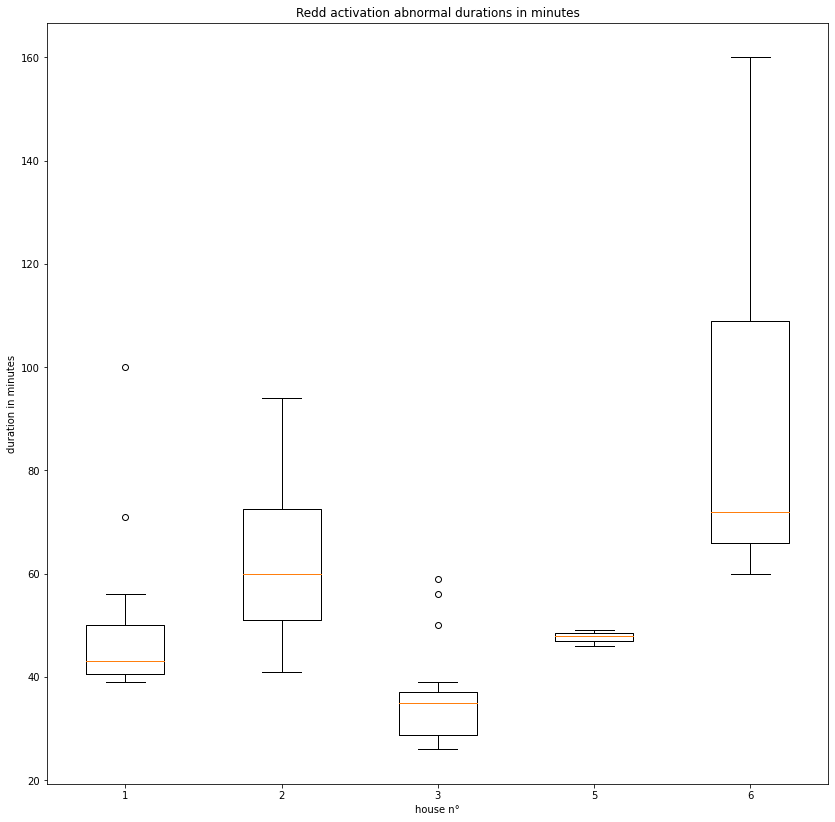

In [ ]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Redd activation abnormal durations in minutes')
ax7.boxplot(abnormal_durations)
#ax7.set_ylim(0,200)
ax7.set_xticklabels(normal_activations.keys())
plt.savefig('Redd activation durations in minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

In [ ]:
redd_normal_durations=[]
for house_nb in [1,2,3,5,6]:
  durations=[]
  activations=Redd_activations[house_nb]
  for i in range(0,len(activations)):
    duration=round((activations[i][1]-activations[i][0])/6)
    if duration <= redd_duration_thresholds[house_nb]:
      durations.append(duration)
  redd_normal_durations.append(durations)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


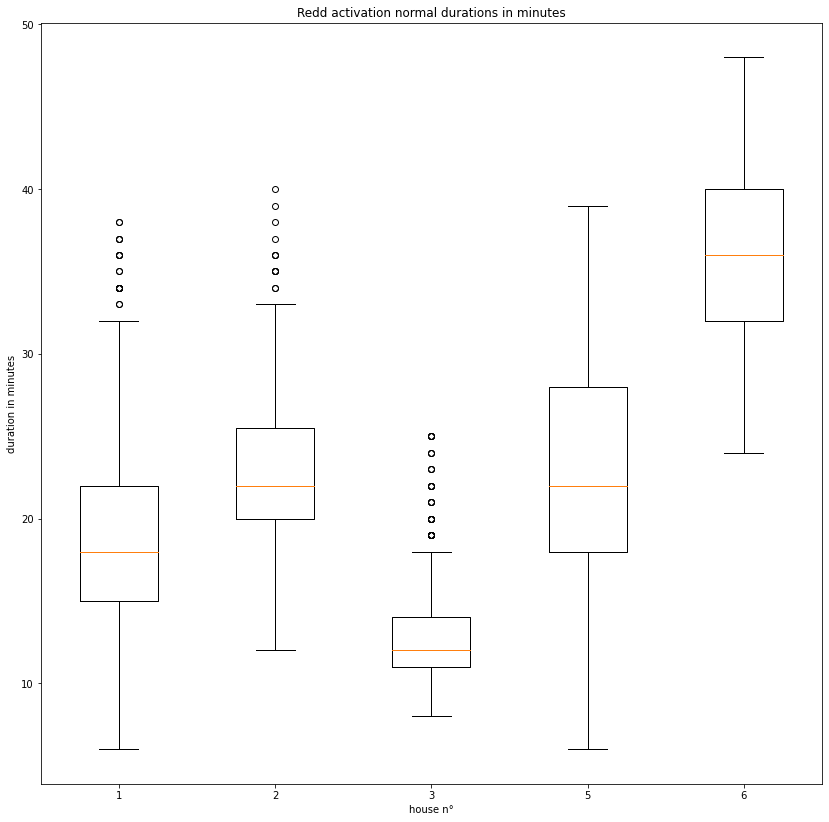

In [ ]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Redd activation normal durations in minutes')
ax7.boxplot(redd_normal_durations)
#ax7.set_ylim(0,100)
ax7.set_xticklabels(normal_activations.keys())
plt.savefig('noemal Redd activation durations in minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

In [ ]:
def get_oversampled_activation_indices(normal_activations_list,abnormal_activations_list):
  normal_nb=len(normal_activations_list)
  abnormal_nb=len(abnormal_activations_list)
  oversampling_nb=normal_nb-abnormal_nb
  oversampled_list=abnormal_activations_list
  for i in range(0,oversampling_nb):
    oversampled_list.append(random.choice(abnormal_activations_list))
  oversampled_list.sort()
  return (oversampled_list)

In [ ]:
oversampled_abnormal_activations={}
for house_nb in [1,2,3,5,6]:
  oversampled_abnormal_activations[house_nb]=get_oversampled_activation_indices(normal_activations[house_nb],abnormal_activations[house_nb])

In [ ]:
redd_oversampled_activations={}
for house_nb in [1,2,3,5,6]:
  activation_list=normal_activations[house_nb]
  print(len(normal_activations[house_nb]))
  activation_list.extend(oversampled_abnormal_activations[house_nb])
  print(len(oversampled_abnormal_activations[house_nb]))
  activation_list.sort()
  print(len(activation_list))
  redd_oversampled_activations[house_nb]=activation_list

539
539
1078
293
293
586
569
569
1138
75
75
150
221
221
442


In [ ]:
redd_oversampled_activations_labels={}
for house_nb in [1,2,3,5,6]:
  label_list=[]
  normal=normal_activations[house_nb]
  abnormal=abnormal_activations[house_nb]
  for activation in redd_oversampled_activations[house_nb]:
    if activation in abnormal :
      label_list.append(1)
    else:
      label_list.append(0)
  redd_oversampled_activations_labels[house_nb]=label_list

In [ ]:
redd_oversampled_activations_labels[3].count(0)

569

In [ ]:
for i in [1,2,3,5,6]:
  with open('drive/MyDrive/redd_oversampled_labeled_activations_'+str(i)+'.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["beginning", "end", "label"])
      for j in range(0,len(redd_oversampled_activations[i])):
        writer.writerow([redd_oversampled_activations[i][j][0], redd_oversampled_activations[i][j][1], redd_oversampled_activations_labels[i][j]])

In [ ]:
def smaller_activations_ffilling(df,activation,windowlength):
  difference=windowlength*6-activation[1]+activation[0]
  new_activation=[]
  if ((len(df.index)-activation[1])>=difference):
    new_activation=list(df.consumption.iloc[activation[0]:activation[1]+difference])
  else :
    new_activation=list(df.consumption.iloc[activation[0]-difference:activation[1]])
  return (new_activation)

In [ ]:
def bigger_activations_ffilling(df,activation,windowlength):
  new_activation=[]
  difference=activation[1]-activation[0]-windowlength*6
  nb_full_activations=(activation[1]-activation[0])//(windowlength*6)
  rest=(activation[1]-activation[0])%(windowlength*6)
  start_index=activation[0]
  listylist=[]
  for i in range (0,nb_full_activations):
    listylist=list(df.consumption.iloc[start_index:(windowlength*6)+start_index])
    new_activation.append(listylist)
    start_index=windowlength*6+start_index
  if rest != 0:
    new_activation.append(smaller_activations_ffilling(df,(start_index,start_index+rest),windowlength))
  return (new_activation)

In [ ]:
x_dict={}
y_dict={}
windowlength=45
for house_nb in [1,2,3,5,6]:
  df=redd_dfs[house_nb]
  house_x=[]
  house_y=[]
  house_activations=redd_oversampled_activations[house_nb]
  house_labels=redd_oversampled_activations_labels[house_nb]
  for (activation,label) in zip(house_activations,house_labels):
    activation_duration=activation[1]-activation[0]
    if activation_duration==windowlength*6:
      house_x.append(list(df.consumption.iloc[activation[0]:activation[1]]))
      house_y.append(label)
    if activation_duration < windowlength*6:
      house_x.append(smaller_activations_ffilling(df,activation,windowlength))
      house_y.append(label)
    if activation_duration > windowlength*6:
      house_x.extend(bigger_activations_ffilling(df,activation,windowlength))
      for i in range(0,len(bigger_activations_ffilling(df,activation,windowlength))):
        house_y.append(label)
  x_dict[house_nb]=house_x
  y_dict[house_nb]=house_y


NameError: ignored

In [ ]:
x_evaluation=x_dict[5]
y_evaluation=y_dict[5]

In [ ]:
x=[]
y=[]
for i in [1,2,3,6]:
  x.extend(x_dict[i])
  y.extend(y_dict[i])

In [ ]:
print(len(x))
len(y)
print(y.count(0))
print(y.count(1))

3506
1631
1875


In [ ]:
def get_normal_activations_compensation(x,y):
  compensation_nb=y.count(1)-y.count(0)
  compensation_list=[]
  while (len(compensation_list)<compensation_nb):
    r=random.randint(0,len(x))
    if y[r]==0:
      compensation_list.append(x[r])
  return(compensation_list)

In [ ]:
compensation_list=get_normal_activations_compensation(x,y)

In [ ]:
len(compensation_list)

244

In [ ]:
for compensation in compensation_list:
  x.append(compensation)
  y.append(0)

In [ ]:
y.count(1)

1875

In [ ]:
print()

In [ ]:
redd_dfs={}

In [ ]:
def read_df(file_title):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df)
    except:
        return(None)

In [ ]:
for i in [1,2,3,5,6]:
    redd_dfs[i]=read_df("drive/MyDrive/Resampled_Redd/house_"+str(i)+".csv")

In [ ]:
def random_activation_selection(activation_list,train_percentage):
    train_indices=random.sample(range(0, len(activation_list)),int(len(activation_list)*train_percentage))
    test_indices=[]
    for index in range(len(activation_list)):
        if index not in train_indices:
            test_indices.append(index)
    return(train_indices,test_indices)

In [ ]:
test_train_houses=[1,2,3,5,6]
test_train_houses.remove(5)
evaluation_houses=[5]

In [ ]:
def get_test_train(df,activation,activation_type,window_length,train_percentage):
    (train_indices,test_indices)=random_activation_selection(activation,train_percentage)
    train_data=[fill_window_length_zeros(activation[i],df,window_length) for i in train_indices]
    train_labels=[activation_type[i] for i in train_indices]
    test_data=[fill_window_length_zeros(activation[i],df,window_length) for i in test_indices]
    test_labels=[activation_type[i] for i in test_indices]
    return(train_data,train_labels,test_data,test_labels)

In [ ]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for i in [1,2,3,6]:
  (train_data,train_labels,test_data,test_labels)=get_test_train(df,Redd_activations[i],Redd_activation_label[i],30,0.7)
  x_train.extend(train_data)
  y_train.extend(train_labels)
  x_test.extend(test_data)
  y_test.extend(test_labels)

In [ ]:
len(y_test)

594